In [10]:
import numpy as np
import time
import os
import pydicom
from pydicom import dcmread
import matplotlib.pyplot as plt

In [2]:
def import_dicom(in_dir_path):
    #names the path to the input model directory, and lists the files in this directory

    in_dir_list = sorted(os.listdir(in_dir_path))
    model_depth = len(in_dir_list)
    model_data = []


    i = 0
    while i < model_depth:
        path = in_dir_path + "/" + in_dir_list[i]
        current_slice = pydicom.dcmread(path)
        model_slice = current_slice.pixel_array
        model_slice = np.asarray(model_slice)
        model_data.append(model_slice)
        i = i + 1
    model_data = np.asarray(model_data, dtype = np.int16)
    
        
    return model_data

In [3]:
####tests the run time to produce a perspectiveless DRR from a 3D array
test_model = import_dicom("./infile")
model_depth = len(test_model)
i = 0
start_time = time.time()
while i < 100:
    average_intensity_projection = np.sum(test_model, axis=0)
    average_intensity_projection = average_intensity_projection/model_depth
    i = i + 1
end_time = time.time()   
timelapse = end_time - start_time

In [4]:
print("the time required to create an average intensity projections 100 times was:",timelapse, "seconds")
print("the average time per AIP was:", timelapse/100, "seconds")

the time required to create an average intensity projections 100 times was: 2.9676690101623535 seconds
the average time per AIP was: 0.029676690101623535 seconds


In [5]:
####tests the run time to both import the CT model and create the perspectiveless DRR
start_time = time.time()
i = 0
while i < 100:
    test_model = import_dicom("./infile")
    model_depth = len(test_model)
    average_intensity_projection = np.sum(test_model, axis=0)
    average_intensity_projection = average_intensity_projection/model_depth
    i = i + 1
end_time = time.time()   
timelapse = end_time - start_time

In [6]:
print("the time required to import a CT scan and create an average intensity projection 100 times was:", timelapse, "seconds")
print("the average time per cyle was:", timelapse/100)

the time required to import a CT scan and create an average intensity projection 100 times was: 67.30316972732544 seconds
the average time per cyle was: 0.6730316972732544


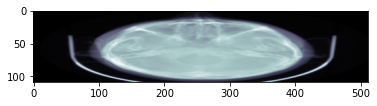

In [12]:
####demonstration of how the same method can be used for orthogonal planes
model_height = len(test_model[0])
average_intensity_projection = np.sum(test_model, axis=1)
average_intensity_projection = average_intensity_projection/model_height

plt.imshow(average_intensity_projection, cmap=plt.cm.bone)

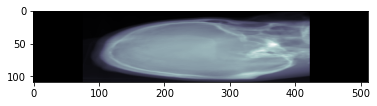

In [13]:
model_width = len(test_model[0][0])
average_intensity_projection = np.sum(test_model, axis=2)
average_intensity_projection = average_intensity_projection/model_width

plt.imshow(average_intensity_projection, cmap=plt.cm.bone)